In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a04001f9464f7ac5d063def5ae5eb84bb28cd383c5821aaba7620ee1a0b09299
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


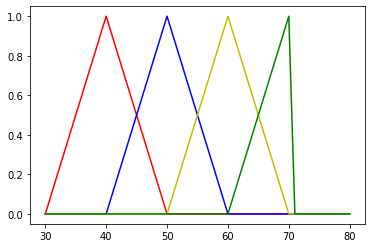

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


x = np.arange(30,81,1)
slow = fuzz.trimf(x,[30,40,50])
medium = fuzz.trimf(x,[40,50,60])
medium_fast = fuzz.trimf(x,[50,60,70])
full_speed = fuzz.trimf(x,[60,70,70])


plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label = 'Slow')
plt.plot(x,medium,'b',linewidth=1.5,label = 'Medium')
plt.plot(x,medium_fast,'y',linewidth=1.5,label = 'Medium_Fast')
plt.plot(x,full_speed,'g',linewidth=1.5,label = 'Full_speed')






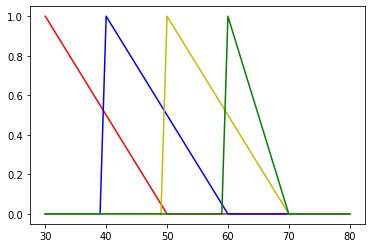

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


x = np.arange(30,81,1)
slow = fuzz.trapmf(x,[30,30,30,50])
medium = fuzz.trapmf(x,[40,40,40,60])
medium_fast = fuzz.trapmf(x,[50,50,50,70])
full_speed = fuzz.trapmf(x,[60,60,60,70])


plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label = 'Slow')
plt.plot(x,medium,'b',linewidth=1.5,label = 'Medium')
plt.plot(x,medium_fast,'y',linewidth=1.5,label = 'Medium_Fast')
plt.plot(x,full_speed,'g',linewidth=1.5,label = 'Full_speed')

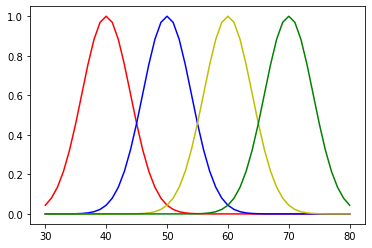

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,81,1)
slow = fuzz.gaussmf(x,40,4)
medium = fuzz.gaussmf(x,50,4)
medium_fast = fuzz.gaussmf(x,60,4)
full_speed = fuzz.gaussmf(x,70,4)

plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5,label = 'Slow')
plt.plot(x,medium,'b',linewidth = 1.5,label = 'Medium')
plt.plot(x,medium_fast,'y',linewidth = 1.5,label = 'Medium_Fast')
plt.plot(x,full_speed,'g',linewidth = 1.5,label = 'Full_Speed')

22.967741935483872


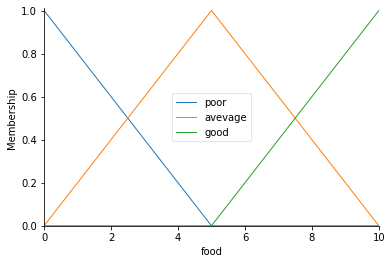

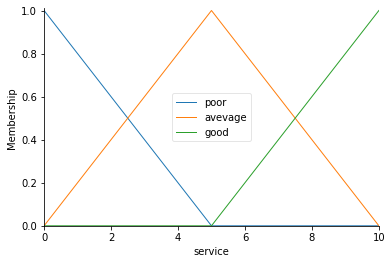

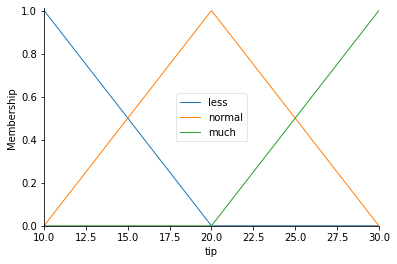

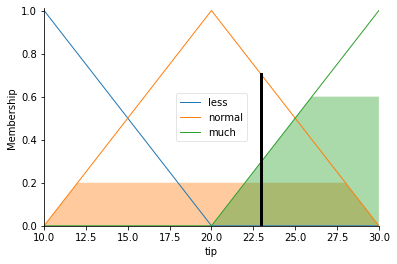

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['avevage'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor'] = fuzz.trimf(food.universe,[0,0,5])
service['avevage'] = fuzz.trimf(food.universe,[0,5,10])
service['good'] = fuzz.trimf(food.universe,[5,10,10])
tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much']  = fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()

rule1 = ctrl.Rule(food['poor']& service['poor'],tip['less'])
rule2 = ctrl.Rule(food['avevage']& service['poor'],tip['normal'])
rule3 = ctrl.Rule(food['good']& service['poor'],tip['normal'])
rule4 = ctrl.Rule(food['poor']& service['avevage'],tip['less'])
rule5 = ctrl.Rule(food['avevage']& service['avevage'],tip['normal'])
rule6 = ctrl.Rule(food['good']& service['avevage'],tip['normal'])
rule7 = ctrl.Rule(food['poor']& service['good'],tip['normal'])
rule8 = ctrl.Rule(food['avevage']& service['good'],tip['much'])
rule9 = ctrl.Rule(food['good']& service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 7
tipping.input['service'] = 9
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)





55.68181818181806


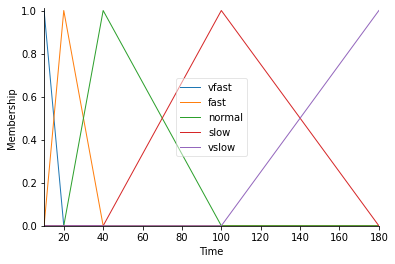

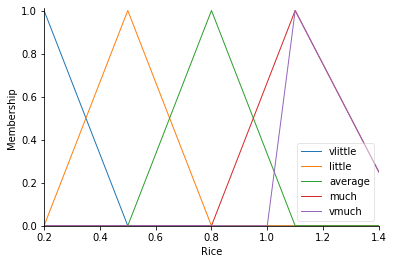

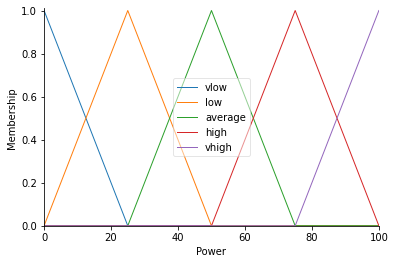

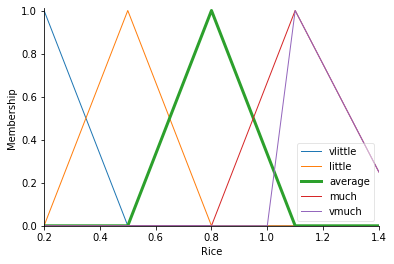

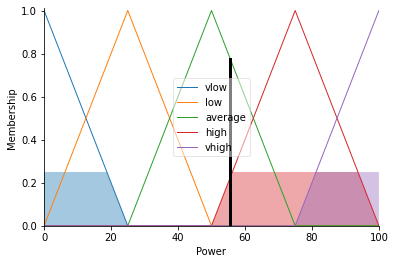

In [ ]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,181,1),'Time')
rice = ctrl.Antecedent(np.arange(0.2,1.5,0.1),'Rice')
power = ctrl.Consequent(np.arange(0,101,1),'Power')

time['vfast']= fuzz.trimf(time.universe,[10,10,20])
time['fast'] = fuzz.trimf(time.universe, [10,20,40])                                 
time['normal']= fuzz.trimf(time.universe, [20,40,100])
time['slow']= fuzz.trimf(time.universe, [40,100,180])
time['vslow']= fuzz.trimf(time.universe, [100,180,180])
rice['vlittle']= fuzz.trimf(rice.universe,[0.2,0.2,0.5])
rice['little'] = fuzz.trimf(rice.universe, [0.2,0.5,0.8])
rice['average']= fuzz.trimf(rice.universe, [0.5,0.8,1.1])
rice['much']= fuzz.trimf(rice.universe, [0.8,1.1,1.5])
rice['vmuch']= fuzz.trimf(rice.universe,[1.1,1.1,1.5])
power['vlow'] = fuzz.trimf(power.universe, [0,0,25])
power['low'] = fuzz.trimf(power.universe,[0,25,50])
power['average'] = fuzz.trimf(power.universe,[25,50,75])
power['high'] = fuzz.trimf(power.universe,[50,75,100])
power['vhigh'] = fuzz.trimf(power.universe,[75,100,100])
time.view()
rice.view()
power.view()
rice['average'].view()
rule1 = ctrl.Rule(time['vfast'] & rice['vlittle'], power['high'])
rule2 = ctrl.Rule(time['vfast'] & rice['little'], power['high'])
rule3 = ctrl.Rule(time['vfast'] & rice['average'], power['vhigh'])
rule4 = ctrl.Rule(time['vfast'] & rice['much'], power['vhigh'])
rule5 = ctrl.Rule(time['vfast'] & rice['vmuch'], power['vhigh'])
rule6 = ctrl.Rule(time['fast'] & rice['vlittle'], power['high'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['high'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['high'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['vhigh'])
rule10 = ctrl.Rule(time['fast'] & rice['vmuch'],power['vhigh'])
rule11 = ctrl.Rule(time['normal'] & rice['vlittle'], power['vlow'])
rule12 = ctrl.Rule(time['normal'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['normal'] & rice['average'], power['average'])
rule14 = ctrl.Rule(time['normal'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['normal'] & rice['vmuch'], power['vhigh'])                 
rule16 = ctrl.Rule(time['slow'] & rice['vlittle'], power['low'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['low'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['vlow'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['vlow'])
rule20 = ctrl.Rule(time['slow'] & rice['vmuch'], power['vlow'])
rule21 = ctrl.Rule(time['vslow'] & rice['vlittle'], power['vlow'])
rule22 = ctrl.Rule(time['vslow'] & rice['little'], power['vlow'])
rule23 = ctrl.Rule(time['vslow'] & rice['average'], power['vlow'])
rule24 = ctrl.Rule(time['vslow'] & rice['much'], power['vlow'])
rule25 = ctrl.Rule(time['vslow'] & rice['vmuch'], power['vlow'])
cpower_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
cpower = ctrl.ControlSystemSimulation(cpower_ctrl)
cpower.input['Time'] = 60
cpower.input['Rice'] = 600
cpower.compute()
print(cpower.output['Power'])
power.view(sim = cpower)


